<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2024/blob/main/%5Bwhisper%5DClase41_SIC_AI_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 41: Trabajo con API de OPENAI

In [1]:
!pip install python-dotenv
!pip install openai
!pip install numpy
!pip install nltk
!pip install spacy
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [2]:
# Importar librerías que usaremos
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import pandas as pd
from openai import OpenAI
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import spacy
from collections import Counter
import wordcloud
from wordcloud import WordCloud

# Descargar recursos de NLTK si es necesario
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Función para utilizar la clave API de OPENAI
def get_openai_api_key():
    # Cargar variables de entorno desde el archivo .env si existe
    load_dotenv()

    # Intentar obtener el valor de la variable de entorno OPENAI_API_KEY
    api_key = os.getenv('OPENAI_API_KEY')

    # Si no se encuentra la API Key o si el usuario prefiere, pedir que la ingrese manualmente
    if not api_key:
        api_key = input("Introduce tu clave de API de OpenAI: ")

    return api_key

# Inicializar el cliente
API_KEY = get_openai_api_key()
client = OpenAI(api_key=API_KEY)

## Transcribir un audio

In [7]:
# Abrir el archivo de audio en modo de lectura binaria
with open("noticia_liviana.mp3", "rb") as audio_file:
    # Crear la transcripción del audio utilizando el cliente de OpenAI
    noticia = client.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file
    )

In [8]:
# Escribir la transcripción en un archivo de texto
with open("texto_noticia.txt", "w") as txt_file:
    txt_file.write(noticia.text)

In [9]:
# Leer el contenido del archivo de transcripción
transcription_file = "texto_noticia.txt"
with open(transcription_file, "r") as file:
    transcription = file.read()

# Tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words("spanish"))
lemmatizer = WordNetLemmatizer()

tokens = word_tokenize(transcription.lower())
cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]

# Contar la frecuencia de las palabras
word_freq = Counter(cleaned_tokens)

# Obtener las palabras más comunes
most_common_words = word_freq.most_common(30)
print("Palabras más comunes:", most_common_words)

Palabras más comunes: [('jorge', 24), ('valdivia', 23), ('caso', 22), ('prisión', 21), ('dice', 21), ('preventiva', 20), ('fiscalía', 16), ('entonces', 14), ('investigación', 11), ('cierto', 11), ('declaraciones', 11), ('va', 10), ('situación', 10), ('jueza', 9), ('delito', 9), ('sexual', 9), ('defensa', 9), ('relaciones', 9), ('bueno', 8), ('si', 8), ('persona', 8), ('testigo', 8), ('víctima', 8), ('aquí', 7), ('días', 7), ('así', 7), ('decisión', 7), ('casos', 7), ('decía', 7), ('sexuales', 7)]


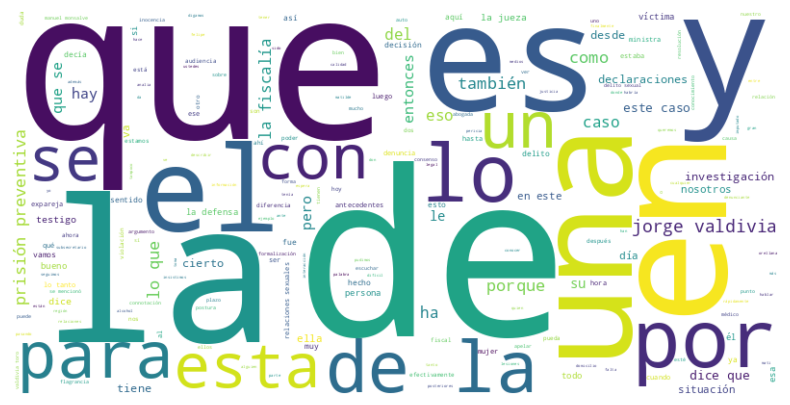

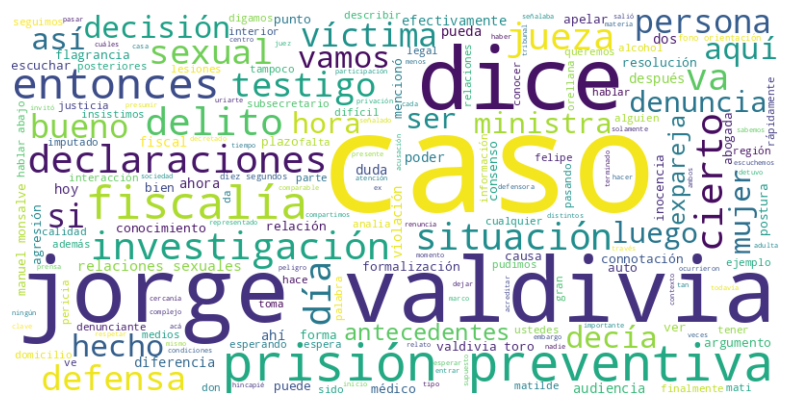

In [11]:
# Crear una nube de palabras con todas las palabras (incluyendo stopwords)
full_text = " ".join(tokens)  # Usar todos los tokens sin filtrar stopwords

wordcloud_full = WordCloud(width=800, height=400, background_color="white").generate(full_text)

# Mostrar la nube de palabras con todas las palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()# Leer el contenido del archivo de transcripción
transcription_file = "texto_noticia.txt"
with open(transcription_file, "r", encoding="utf-8") as file:
    transcription = file.read()

# Tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words("spanish"))

# Tokenizar el texto
tokens = word_tokenize(transcription.lower())

# Filtrar tokens no alfanuméricos y palabras vacías
cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# Unir los tokens en un solo texto
cleaned_text = " ".join(cleaned_tokens)

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()